## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

## LOAD DATASET

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

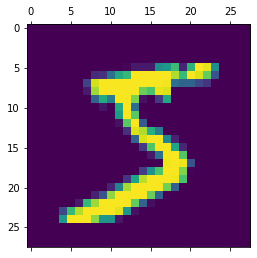

In [7]:
plt.matshow(x_train[0])

In [8]:
y_train[0]

5

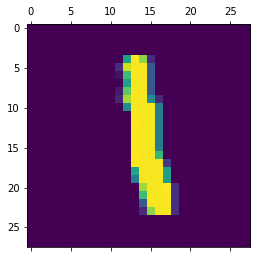

In [9]:
plt.matshow(x_train[6])

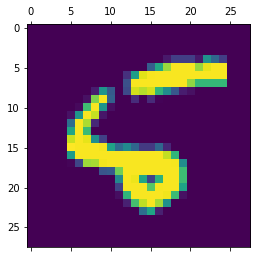

In [10]:
plt.matshow(x_test[8])

In [11]:
y_test[8]

5

##### Use scaling here all values are between 0 to 255
##### Scaling are use for the improve accuracy score

In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [13]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
x_train.shape

(60000, 28, 28)

##### Now Covert 2D array to 1D Array using reshape method

In [15]:

x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [16]:
x_train_flattened.shape

(60000, 784)

In [17]:
x_test_flattened.shape

(10000, 784)

## BUILD THE NEURAL NETWORK

In [18]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4756 - accuracy: 0.8747
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3042 - accuracy: 0.9152
Epoch 3/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2835 - accuracy: 0.9204
Epoch 4/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2667 - accuracy: 0.9257
Epoch 6/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2620 - accuracy: 0.9273
Epoch 7/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2584 - accuracy: 0.9285
Epoch 8/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2556 - accuracy: 0.9288


In [19]:
#evaluate the model
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.2689 - accuracy: 0.9249


[0.26893115043640137, 0.9248999953269958]

## MAKE PREDICTION

In [20]:
y_pred=model.predict(x_test_flattened)

313/313 [==============================] - 1s 3ms/step


In [21]:
y_pred[23]

array([1.3400628e-01, 6.5613705e-05, 7.6189429e-02, 1.1158978e-01,
       3.7004104e-01, 9.9540532e-01, 1.8208565e-01, 1.2810794e-06,
       4.1510513e-01, 9.6913031e-04], dtype=float32)

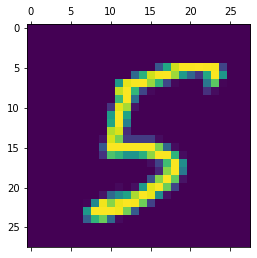

In [22]:
plt.matshow(x_test[23])

In [23]:
np.argmax(y_pred[23])

5

In [24]:
y_pred[5]

array([2.4733024e-05, 9.9764735e-01, 4.8058265e-01, 4.6395686e-01,
       6.5533342e-03, 1.6195318e-02, 4.8971428e-03, 5.9490067e-01,
       4.1714582e-01, 9.6621811e-02], dtype=float32)

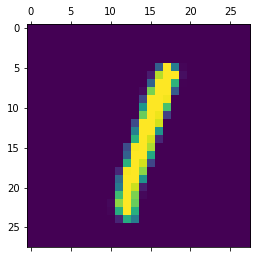

In [25]:
plt.matshow(x_test[5])

In [26]:
np.argmax(y_pred[5])

1

## VISUALIZE THE ACTUAL AND PREDICTED VALUES

In [27]:
y_predicted_labels = [np.argmax(i) for i in y_pred]

In [28]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1117,    3,    3,    0,    1,    3,    2,    6,    0],
       [   7,   11,  923,   23,    9,    4,   10,    8,   34,    3],
       [   2,    0,   14,  925,    1,   30,    2,    9,   21,    6],
       [   2,    1,    5,    2,  927,    0,    6,    4,   11,   24],
       [  10,    2,    2,   34,   11,  782,   11,    6,   30,    4],
       [  14,    3,   10,    1,    8,   14,  904,    2,    2,    0],
       [   1,    5,   23,    9,    9,    1,    0,  953,    3,   24],
       [   8,   12,    6,   27,    9,   24,    9,   12,  863,    4],
       [  11,    7,    1,   13,   38,    6,    0,   34,   10,  889]])>

Text(69.0, 0.5, 'Truth')

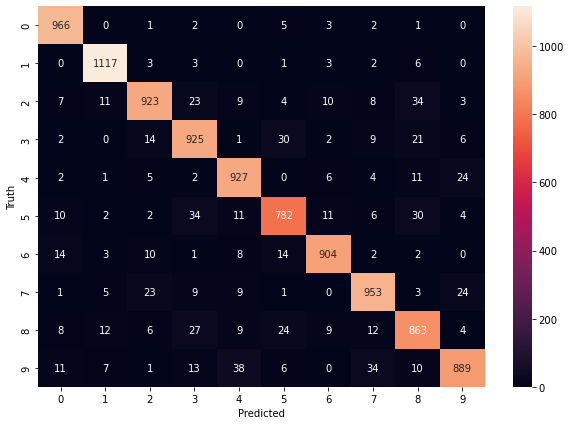

In [29]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Above output is without hidden layer now add the hidden layer and check the accuracy score

## ADD HIDDEN LAYER

In [30]:
# BUILD THE NEURAL NETWORK
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_flattened, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2682 - accuracy: 0.9247
Epoch 2/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1208 - accuracy: 0.9644
Epoch 3/8
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0859 - accuracy: 0.9740
Epoch 4/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0652 - accuracy: 0.9805
Epoch 5/8
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0514 - accuracy: 0.9843
Epoch 6/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0419 - accuracy: 0.9869
Epoch 7/8
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0337 - accuracy: 0.9897
Epoch 8/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0284 - accuracy: 0.9912


In [31]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.0799 - accuracy: 0.9767


[0.07989156246185303, 0.9767000079154968]

##### We can clearly see the differance between both acuuracy  
##### Without using hidden layer = 0.9248999953269958
##### With hidden layer = 0.9767000079154968

In [32]:
y_pred=model.predict(x_test_flattened)

313/313 [==============================] - 1s 3ms/step


In [33]:
y_pred[3]

array([9.99999821e-01, 1.35378359e-05, 8.98858368e-01, 2.26236269e-04,
       1.99390015e-05, 6.46329252e-04, 1.80939096e-03, 7.87382871e-02,
       1.00599114e-04, 5.89338243e-01], dtype=float32)

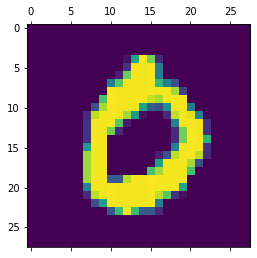

In [34]:
plt.matshow(x_test[3])

In [35]:
np.argmax(y_pred[3])

0